<a href="https://colab.research.google.com/github/subho99/Computational-Data-Science/blob/main/SubhajitBasistha_M6_AST_07_StockPrice_Prediction_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 7: Stock Price prediction using ARIMA

## Learning Objectives

At the end of the experiment you will be able to :

- Predict stock prices using ARIMA


## Dataset description

In this Dataset, we see stocks and ETFs (Exchange trade funding) data for USA. The data is last updated on 11-10-2017 and is in txt format.
The columns of the data are:
1. Date
2. Open
3. High
4. Low
5. Close
6. volume
7. OpenInt


[Dataset link]( https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs)


The files present are named according to Stock listing


A ticker symbol or stock symbol is an abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market. A stock symbol may consist of letters, numbers or a combination of both. "Ticker symbol" refers to the symbols that were printed on the ticker tape of a ticker tape machine.

To understand better go through : https://www.nasdaq.com/market-activity/stocks/screener

###  Domain Information
Stock price forecasting is one of the most challenging tasks in financial decision-making because stock prices are inherently noisy and non-stationary and have been observed to have a random-walk characteristic. Accurate stock price predictions can yield significant profits and therefore econometric and statistical approaches including linear/non-linear methods such as autoregressive (AR) models, moving averages (MA), autoregressive moving averages (ARIMA) and artificial neural networks have been in use.

## ARIMA

Autoregressive Integrated Moving Average Model (ARIMA)
is a generalized model of Autoregressive Moving Average (ARMA) that combines
Autoregressive (AR) process and Moving Average (MA) processes and builds a composite model of the time series.
As the acronym indicates, ARIMA (p, d, q) captures the key elements of the model:
- AR: Autoregression. A regression model that uses the dependencies between an observation and a number of
lagged observations (p).
- I: Integrated. To make the time series stationary by measuring the differences of observations at different time
(d).
- MA: Moving Average. An approach that takes into accounts the dependency between observations and the
residual error terms when a moving average model is used to the lagged observations (q).


### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2236624" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "8240187807" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M6_AST_07_StockPrice_Prediction_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/msft.us.txt")

    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")

Setup completed successfully


### Importing required packages

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

### Microsoft Stock Market Analysis using ARIMA


Read the Microsoft stock prices data file

In this notebook, we will just examine the “Close” stock prices feature. This same analysis can be repeated for most of the other features.

In [5]:
# You can change the file to predict stocks for different companies
# Open, High, Low, Close values are in dollars.
# Volume refers to the number of contracts traded in a given period,
# Open interest denotes the number of contracts that are open or active.

df = pd.read_csv("/content/msft.us.txt").fillna(0)
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [6]:
print(df.shape)
print(df.columns)

(7983, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


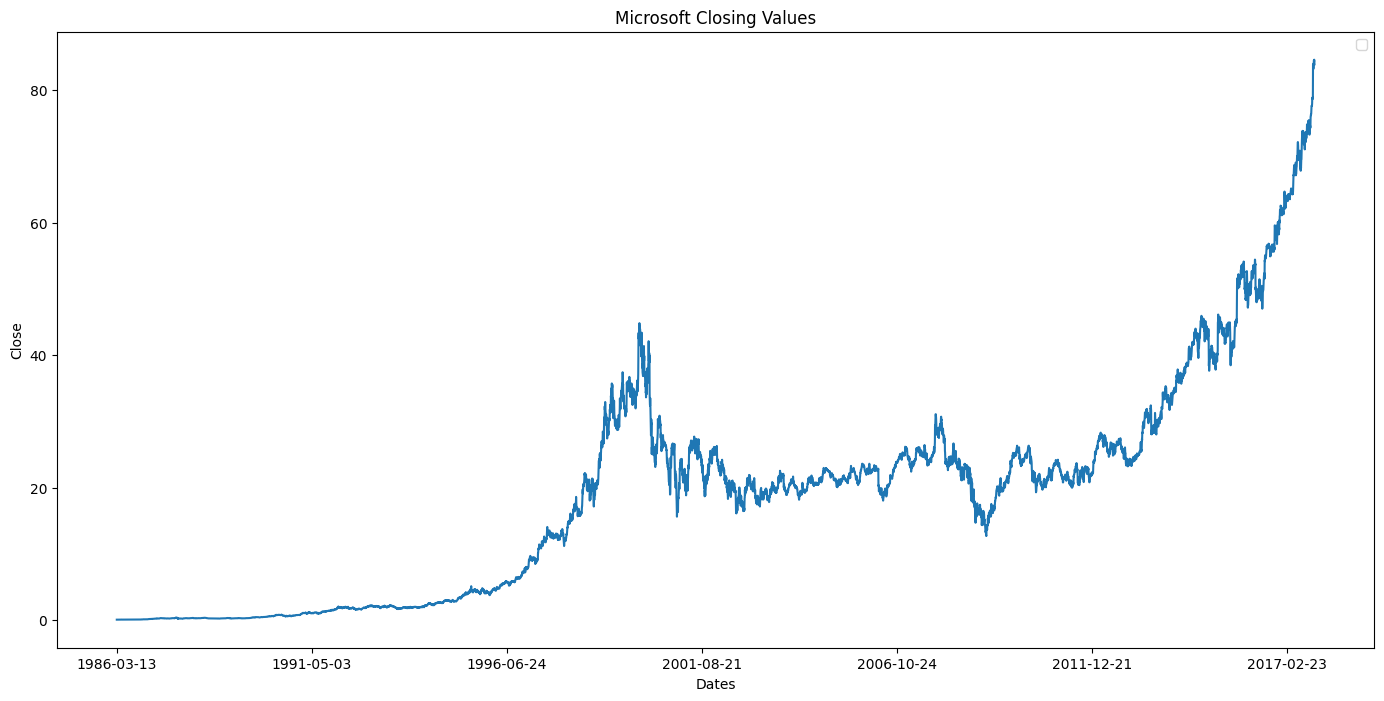

In [7]:
# Plot the closing values for Microsoft
plt.figure(figsize=(17,8))
plt.plot(df['Close'])
plt.title('Microsoft Closing Values')
plt.xlabel('Dates')
plt.ylabel('Close')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

                             Date     Open     High      Low    Close  OpenInt
0                      1986-03-13  0.06720  0.07533  0.06720  0.07533        0
1            1986-03-131986-03-14  0.14253  0.15066  0.14253  0.15066        0
2  1986-03-131986-03-141986-03-17  0.21786  0.22599  0.21786  0.22599        0


Text(0.5, 1.0, 'Microsoft Cumulative Returns')

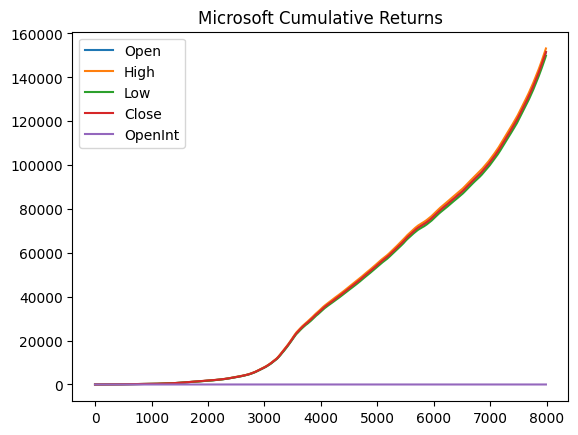

In [8]:
# Return the cumulative sum of the dataframe
df = df.drop(['Volume'],axis=1)
dr = df.cumsum()
print(dr[:3])
dr.plot()
plt.title('Microsoft Cumulative Returns')

#### Test the stationarity using Dickey-Fuller test

In [9]:
# Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df.Close, autolag='AIC', maxlag = 20 )
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
pvalue = dftest[1]
if pvalue < 0.01:
    print('p-value = %.4f. The series is likely stationary.' % pvalue)
else:
    print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

print(dfoutput)

Results of Dickey-Fuller Test:
p-value = 0.9988. The series is likely non-stationary.
Test Statistic                    2.133638
p-value                           0.998823
#Lags Used                       18.000000
Number of Observations Used    7964.000000
Critical Value (1%)              -3.431171
Critical Value (5%)              -2.861903
Critical Value (10%)             -2.566963
dtype: float64


In [10]:
# Apply differencing
diff = df.Close.diff(1).fillna(0)

In [11]:
# Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(diff, autolag='AIC', maxlag = 20 )
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
pvalue = dftest[1]
if pvalue < 0.01:
    print('p-value = %.4f. The series is likely stationary.' % pvalue)
else:
    print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

print(dfoutput)

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -19.756350
p-value                           0.000000
#Lags Used                       20.000000
Number of Observations Used    7962.000000
Critical Value (1%)              -3.431172
Critical Value (5%)              -2.861903
Critical Value (10%)             -2.566963
dtype: float64


Before starting working on Time Series prediction, we will analyse the autocorrelation plot of the "Close" feature with respect to a fixed lag of 1.

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

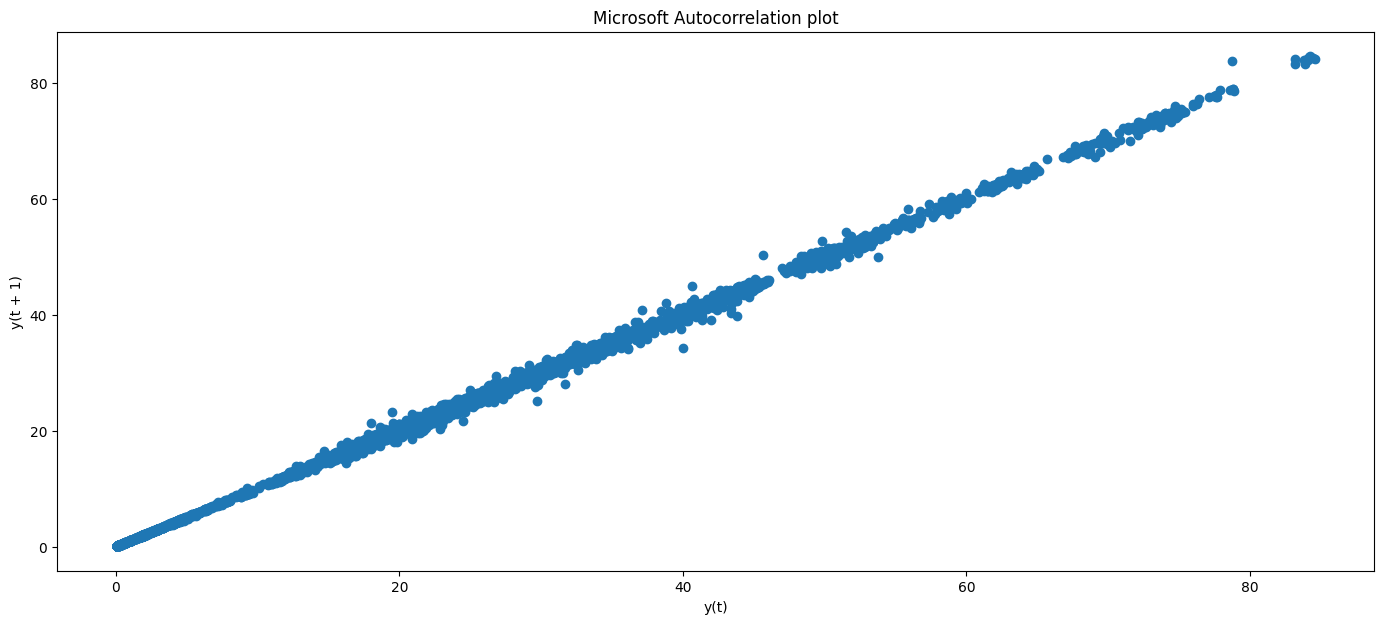

In [12]:
# Find the autocorrelation using lag plot.
# A lag plot checks whether a data set or time series is random or not.
# Non-random data exhibits an identifiable structure in the lag plot (eg. linear structure).
plt.figure(figsize=(17,7))
lag_plot(df['Close'], lag=1)
plt.title('Microsoft Autocorrelation plot')

The above graph exhibits a linear pattern indicating that the data are non-random and suggests that an autoregressive model will be appropriate for this data.

In [13]:
# Find out the last date given in Microsoft data
df['Date'][::-1]

7982    2017-11-10
7981    2017-11-09
7980    2017-11-08
7979    2017-11-07
7978    2017-11-06
           ...    
4       1986-03-19
3       1986-03-18
2       1986-03-17
1       1986-03-14
0       1986-03-13
Name: Date, Length: 7983, dtype: object

### Split the data

Divide the data into train, test split in 80:20 ratio and plot the series.

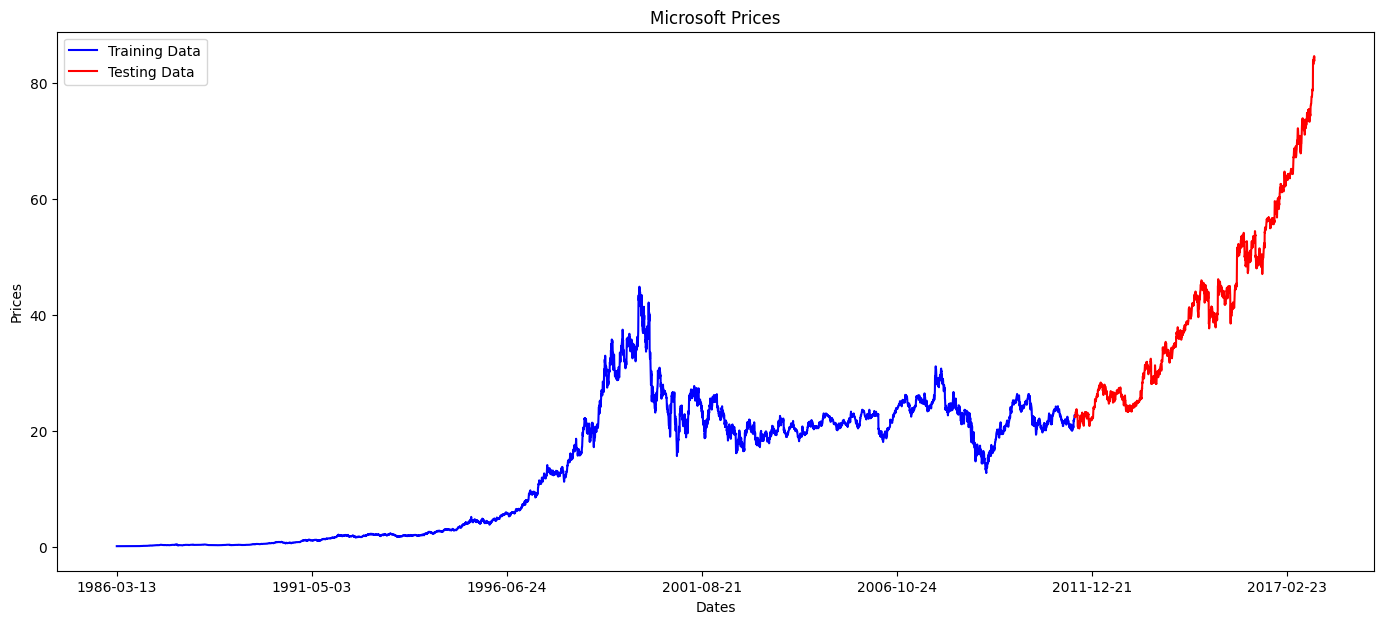

In [14]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):] # Train and test split
plt.figure(figsize=(17,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Close'], 'blue', label='Training Data') #Plot train data in blue color
plt.plot(test_data['Close'], 'red', label='Testing Data')  # Plot test data in red color
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()
plt.show()

#### Define a function for calculating the loss (Mean absolute percentage error)

In [15]:
# Function to Calculate the mean absolute percentage error
# The mean absolute percentage error (MAPE) is a statistical measure of how accurate a forecast system is.
# It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time
# period minus actual values divided by actual values
def  Mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

<Axes: >

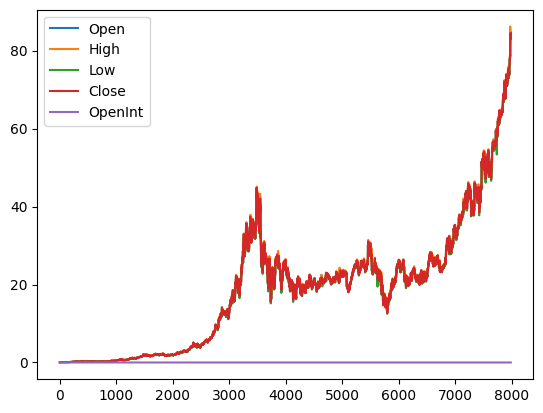

In [16]:
df.plot()

#### ACF and PACF Plot

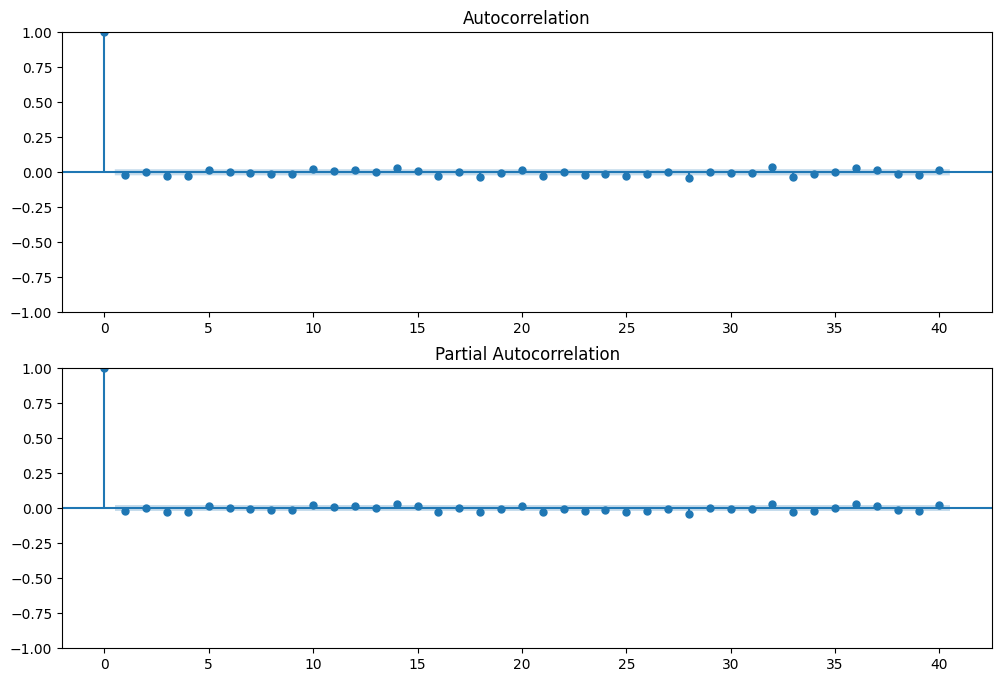

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff, lags=40, ax=ax2)

###ARIMA model

In [ ]:
# ARIMA model
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]

predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    # regarding the fit of the regression model.
    output = model_fit.forecast() # one-step forecast
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.478000, expected=22.400000
predicted=22.400000, expected=22.478000
predicted=22.478000, expected=22.342000
predicted=22.342000, expected=22.606000
predicted=22.606000, expected=22.445000
predicted=22.445000, expected=23.249000
predicted=23.249000, expected=22.840000
predicted=22.840000, expected=22.867000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.867000, expected=23.239000
predicted=23.239000, expected=23.557000
predicted=23.557000, expected=23.698000
predicted=23.698000, expected=23.068000
predicted=23.068000, expected=23.402000
predicted=23.402000, expected=23.124000
predicted=23.124000, expected=23.018000
predicted=23.018000, expected=22.619000
predicted=22.619000, expected=22.724000
predicted=22.724000, expected=21.898000
predicted=21.898000, expected=21.678000
predicted=21.678000, expected=20.667000
predicted=20.667000, expected=21.591000
predicted=21.591000, expected=20.428000
predicted=20.428000, expected=21.261000
predicted=21.261000, expected=21.184000
predicted=21.184000, expected=21.534000
predicted=21.534000, expected=21.534000
predicted=21.534000, expected=21.447000
predicted=21.447000, expected=20.955000
predicted=20.955000, expected=20.428000
predicted=20.428000, expected=20.368000
predicted=20.368000, expected=20.997000
predicted=20.997000, expected=21.150000
predicted=21.150000, expected=20.872000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.112000, expected=22.918000
predicted=22.918000, expected=22.077000
predicted=22.077000, expected=21.286000
predicted=21.286000, expected=21.286000
predicted=21.286000, expected=21.609000
predicted=21.609000, expected=21.805000
predicted=21.805000, expected=21.718000
predicted=21.718000, expected=21.616000
predicted=21.616000, expected=21.139000
predicted=21.139000, expected=20.836000
predicted=20.836000, expected=21.525000
predicted=21.525000, expected=21.994000
predicted=21.994000, expected=22.370000
predicted=22.370000, expected=22.298000
predicted=22.298000, expected=22.884000
predicted=22.884000, expected=22.933000
predicted=22.933000, expected=22.899000
predicted=22.899000, expected=23.087000
predicted=23.087000, expected=23.164000
predicted=23.164000, expected=22.918000
predicted=22.918000, expected=23.197000
predicted=23.197000, expected=23.044000
predicted=23.044000, expected=22.968000
predicted=22.968000, expected=23.072000
predicted=23.072000, expected=23.096000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.885000, expected=26.946000
predicted=26.946000, expected=26.920000
predicted=26.920000, expected=27.084000
predicted=27.084000, expected=26.937000
predicted=26.937000, expected=27.023000
predicted=27.023000, expected=27.119000
predicted=27.119000, expected=27.005000
predicted=27.005000, expected=27.455000
predicted=27.455000, expected=27.338000
predicted=27.338000, expected=27.817000
predicted=27.817000, expected=27.636000
predicted=27.636000, expected=27.394000
predicted=27.394000, expected=27.185000
predicted=27.185000, expected=27.430000
predicted=27.430000, expected=27.576000
predicted=27.576000, expected=27.557000
predicted=27.557000, expected=27.600000
predicted=27.600000, expected=28.142000
predicted=28.142000, expected=28.232000
predicted=28.232000, expected=28.298000
predicted=28.298000, expected=28.084000
predicted=28.084000, expected=27.738000
predicted=27.738000, expected=27.557000
predicted=27.557000, expected=27.490000
predicted=27.490000, expected=27.567000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.029000, expected=25.874000
predicted=25.874000, expected=26.619000
predicted=26.619000, expected=26.819000
predicted=26.819000, expected=26.135000
predicted=26.135000, expected=26.619000
predicted=26.619000, expected=25.891000
predicted=25.891000, expected=26.029000
predicted=26.029000, expected=26.159000
predicted=26.159000, expected=25.934000
predicted=25.934000, expected=26.524000
predicted=26.524000, expected=26.500000
predicted=26.500000, expected=26.671000
predicted=26.671000, expected=26.619000
predicted=26.619000, expected=26.168000
predicted=26.168000, expected=26.014000
predicted=26.014000, expected=25.786000
predicted=25.786000, expected=25.406000
predicted=25.406000, expected=24.826000
predicted=24.826000, expected=25.483000
predicted=25.483000, expected=25.527000
predicted=25.527000, expected=25.718000
predicted=25.718000, expected=26.403000
predicted=26.403000, expected=26.593000
predicted=26.593000, expected=26.108000
predicted=26.108000, expected=25.388000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.813000, expected=26.875000
predicted=26.875000, expected=26.866000
predicted=26.866000, expected=26.996000
predicted=26.996000, expected=27.241000
predicted=27.241000, expected=27.241000
predicted=27.241000, expected=27.205000
predicted=27.205000, expected=27.101000
predicted=27.101000, expected=27.451000
predicted=27.451000, expected=27.223000
predicted=27.223000, expected=26.866000
predicted=26.866000, expected=26.525000
predicted=26.525000, expected=26.333000
predicted=26.333000, expected=26.325000
predicted=26.325000, expected=25.976000
predicted=25.976000, expected=25.740000
predicted=25.740000, expected=25.888000
predicted=25.888000, expected=26.063000
predicted=26.063000, expected=26.211000
predicted=26.211000, expected=26.053000
predicted=26.053000, expected=25.994000
predicted=25.994000, expected=25.558000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.558000, expected=25.295000
predicted=25.295000, expected=25.267000
predicted=25.267000, expected=25.486000
predicted=25.486000, expected=25.758000
predicted=25.758000, expected=25.740000
predicted=25.740000, expected=25.828000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.828000, expected=25.750000
predicted=25.750000, expected=24.998000
predicted=24.998000, expected=24.441000
predicted=24.441000, expected=24.484000
predicted=24.484000, expected=24.352000
predicted=24.352000, expected=24.336000
predicted=24.336000, expected=24.624000
predicted=24.624000, expected=24.909000
predicted=24.909000, expected=25.758000
predicted=25.758000, expected=25.750000
predicted=25.750000, expected=25.862000
predicted=25.862000, expected=26.063000
predicted=26.063000, expected=25.382000
predicted=25.382000, expected=25.147000
predicted=25.147000, expected=25.165000
predicted=25.165000, expected=24.630000
predicted=24.630000, expected=23.840000
predicted=23.840000, expected=23.620000
predicted=23.620000, expected=23.461000
predicted=23.461000, expected=23.339000
predicted=23.339000, expected=23.523000
predicted=23.523000, expected=23.506000
predicted=23.506000, expected=23.716000
predicted=23.716000, expected=24.375000
predicted=24.375000, expected=24.102000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.592000, expected=23.840000
predicted=23.840000, expected=24.251000
predicted=24.251000, expected=24.035000
predicted=24.035000, expected=24.359000
predicted=24.359000, expected=24.156000
predicted=24.156000, expected=23.812000
predicted=23.812000, expected=23.638000
predicted=23.638000, expected=23.725000
predicted=23.725000, expected=23.364000
predicted=23.364000, expected=23.506000
predicted=23.506000, expected=24.306000
predicted=24.306000, expected=23.980000
predicted=23.980000, expected=23.531000
predicted=23.531000, expected=23.489000
predicted=23.489000, expected=23.364000
predicted=23.364000, expected=23.497000
predicted=23.497000, expected=23.284000
predicted=23.284000, expected=23.610000
predicted=23.610000, expected=23.663000
predicted=23.663000, expected=23.942000
predicted=23.942000, expected=23.794000
predicted=23.794000, expected=23.980000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.980000, expected=23.980000
predicted=23.980000, expected=23.894000
predicted=23.894000, expected=24.298000
predicted=24.298000, expected=24.316000
predicted=24.316000, expected=24.534000
predicted=24.534000, expected=24.561000
predicted=24.561000, expected=24.649000
predicted=24.649000, expected=24.508000
predicted=24.508000, expected=24.156000
predicted=24.156000, expected=24.579000
predicted=24.579000, expected=24.147000
predicted=24.147000, expected=24.201000
predicted=24.201000, expected=24.059000
predicted=24.059000, expected=24.007000
predicted=24.007000, expected=24.242000
predicted=24.242000, expected=24.517000
predicted=24.517000, expected=24.534000
predicted=24.534000, expected=24.667000
predicted=24.667000, expected=24.676000
predicted=24.676000, expected=24.649000
predicted=24.649000, expected=24.884000
predicted=24.884000, expected=24.728000
predicted=24.728000, expected=24.389000
predicted=24.389000, expected=24.630000
predicted=24.630000, expected=24.286000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.274000, expected=26.867000
predicted=26.867000, expected=25.669000
predicted=25.669000, expected=25.545000
predicted=25.545000, expected=25.457000
predicted=25.457000, expected=25.705000
predicted=25.705000, expected=25.582000
predicted=25.582000, expected=25.545000
predicted=25.545000, expected=26.405000
predicted=26.405000, expected=27.353000
predicted=27.353000, expected=27.152000
predicted=27.152000, expected=28.179000
predicted=28.179000, expected=28.340000
predicted=28.340000, expected=28.207000
predicted=28.207000, expected=28.933000
predicted=28.933000, expected=29.370000
predicted=29.370000, expected=29.032000
predicted=29.032000, expected=29.422000
predicted=29.422000, expected=29.717000
predicted=29.717000, expected=29.944000
predicted=29.944000, expected=29.558000
predicted=29.558000, expected=29.273000
predicted=29.273000, expected=28.979000
predicted=28.979000, expected=29.007000
predicted=29.007000, expected=29.309000
predicted=29.309000, expected=29.959000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.157000, expected=31.344000
predicted=31.344000, expected=31.140000
predicted=31.140000, expected=30.923000
predicted=30.923000, expected=30.512000
predicted=30.512000, expected=30.621000
predicted=30.621000, expected=31.291000
predicted=31.291000, expected=31.165000
predicted=31.165000, expected=31.300000
predicted=31.300000, expected=31.188000
predicted=31.188000, expected=31.800000
predicted=31.800000, expected=31.263000
predicted=31.263000, expected=31.076000
predicted=31.076000, expected=31.237000
predicted=31.237000, expected=31.872000
predicted=31.872000, expected=31.694000
predicted=31.694000, expected=31.130000
predicted=31.130000, expected=31.273000
predicted=31.273000, expected=31.023000
predicted=31.023000, expected=30.737000
predicted=30.737000, expected=31.273000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.273000, expected=31.254000
predicted=31.254000, expected=30.908000
predicted=30.908000, expected=29.924000
predicted=29.924000, expected=29.720000
predicted=29.720000, expected=30.130000
predicted=30.130000, expected=30.085000
predicted=30.085000, expected=30.692000
predicted=30.692000, expected=30.933000
predicted=30.933000, expected=30.864000
predicted=30.864000, expected=30.702000
predicted=30.702000, expected=30.324000
predicted=30.324000, expected=30.388000
predicted=30.388000, expected=30.569000
predicted=30.569000, expected=30.673000
predicted=30.673000, expected=30.692000
predicted=30.692000, expected=31.006000
predicted=31.006000, expected=31.889000
predicted=31.889000, expected=31.872000
predicted=31.872000, expected=32.319000
predicted=32.319000, expected=32.406000
predicted=32.406000, expected=31.935000
predicted=31.935000, expected=31.666000
predicted=31.666000, expected=28.056000
predicted=28.056000, expected=28.601000
predicted=28.601000, expected=28.432000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.457000, expected=28.449000
predicted=28.449000, expected=28.297000
predicted=28.297000, expected=28.494000
predicted=28.494000, expected=28.323000
predicted=28.323000, expected=28.218000
predicted=28.218000, expected=28.646000
predicted=28.646000, expected=29.388000
predicted=29.388000, expected=29.217000
predicted=29.217000, expected=29.370000
predicted=29.370000, expected=29.001000
predicted=29.001000, expected=29.110000
predicted=29.110000, expected=28.605000
predicted=28.605000, expected=28.614000
predicted=28.614000, expected=28.246000
predicted=28.246000, expected=28.451000
predicted=28.451000, expected=28.443000
predicted=28.443000, expected=29.145000
predicted=29.145000, expected=31.268000
predicted=31.268000, expected=30.729000
predicted=30.729000, expected=29.927000
predicted=29.927000, expected=29.714000
predicted=29.714000, expected=30.188000
predicted=30.188000, expected=30.052000
predicted=30.052000, expected=28.686000
predicted=28.686000, expected=28.065000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.485000, expected=29.963000
predicted=29.963000, expected=29.705000
predicted=29.705000, expected=29.758000
predicted=29.758000, expected=30.378000
predicted=30.378000, expected=30.711000
predicted=30.711000, expected=30.999000
predicted=30.999000, expected=31.036000
predicted=31.036000, expected=31.169000
predicted=31.169000, expected=31.422000
predicted=31.422000, expected=31.457000
predicted=31.457000, expected=31.485000
predicted=31.485000, expected=31.114000
predicted=31.114000, expected=30.378000
predicted=30.378000, expected=30.340000
predicted=30.340000, expected=32.149000
predicted=32.149000, expected=32.007000
predicted=32.007000, expected=31.962000
predicted=31.962000, expected=31.980000
predicted=31.980000, expected=31.858000
predicted=31.858000, expected=31.971000
predicted=31.971000, expected=32.341000
predicted=32.341000, expected=32.969000
predicted=32.969000, expected=34.355000
predicted=34.355000, expected=33.744000
predicted=33.744000, expected=33.995000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.106000, expected=34.181000
predicted=34.181000, expected=34.263000
predicted=34.263000, expected=34.482000
predicted=34.482000, expected=34.693000
predicted=34.693000, expected=34.428000
predicted=34.428000, expected=34.290000
predicted=34.290000, expected=34.227000
predicted=34.227000, expected=34.583000
predicted=34.583000, expected=34.994000
predicted=34.994000, expected=34.508000
predicted=34.508000, expected=35.086000
predicted=35.086000, expected=34.811000
predicted=34.811000, expected=34.847000
predicted=34.847000, expected=34.620000
predicted=34.620000, expected=34.546000
predicted=34.546000, expected=34.729000
predicted=34.729000, expected=34.958000
predicted=34.958000, expected=34.611000
predicted=34.611000, expected=34.437000
predicted=34.437000, expected=34.756000
predicted=34.756000, expected=36.126000
predicted=36.126000, expected=35.870000
predicted=35.870000, expected=36.838000
predicted=36.838000, expected=36.685000
predicted=36.685000, expected=36.992000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.001000, expected=36.901000
predicted=36.901000, expected=36.538000
predicted=36.538000, expected=36.255000
predicted=36.255000, expected=36.015000
predicted=36.015000, expected=35.676000
predicted=35.676000, expected=36.007000
predicted=36.007000, expected=36.208000
predicted=36.208000, expected=36.117000
predicted=36.117000, expected=36.511000
predicted=36.511000, expected=37.181000
predicted=37.181000, expected=37.015000
predicted=37.015000, expected=36.426000
predicted=36.426000, expected=36.639000
predicted=36.639000, expected=36.564000
predicted=36.564000, expected=36.502000
predicted=36.502000, expected=37.115000
predicted=37.115000, expected=36.886000
predicted=36.886000, expected=36.904000
predicted=36.904000, expected=36.972000
predicted=36.972000, expected=36.806000
predicted=36.806000, expected=37.110000
predicted=37.110000, expected=37.660000
predicted=37.660000, expected=37.522000
predicted=37.522000, expected=37.062000
predicted=37.062000, expected=37.091000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.624000, expected=38.396000
predicted=38.396000, expected=38.662000
predicted=38.662000, expected=38.378000
predicted=38.378000, expected=38.864000
predicted=38.864000, expected=38.359000
predicted=38.359000, expected=38.515000
predicted=38.515000, expected=38.544000
predicted=38.544000, expected=38.451000
predicted=38.451000, expected=38.624000
predicted=38.624000, expected=38.432000
predicted=38.432000, expected=38.330000
predicted=38.330000, expected=38.349000
predicted=38.349000, expected=38.719000
predicted=38.719000, expected=38.764000
predicted=38.764000, expected=39.051000
predicted=39.051000, expected=40.546000
predicted=40.546000, expected=40.964000
predicted=40.964000, expected=41.110000
predicted=41.110000, expected=41.238000
predicted=41.238000, expected=41.238000
predicted=41.238000, expected=41.275000
predicted=41.275000, expected=40.842000
predicted=40.842000, expected=40.935000
predicted=40.935000, expected=40.447000
predicted=40.447000, expected=40.365000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.096000, expected=43.579000
predicted=43.579000, expected=42.615000
predicted=42.615000, expected=42.957000
predicted=42.957000, expected=42.987000
predicted=42.987000, expected=42.911000
predicted=42.911000, expected=42.487000
predicted=42.487000, expected=42.356000
predicted=42.356000, expected=42.661000
predicted=42.661000, expected=42.661000
predicted=42.661000, expected=42.143000
predicted=42.143000, expected=43.301000
predicted=43.301000, expected=42.440000
predicted=42.440000, expected=40.754000
predicted=40.754000, expected=40.402000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.402000, expected=40.477000
predicted=40.477000, expected=40.006000
predicted=40.006000, expected=39.561000
predicted=39.561000, expected=40.384000
predicted=40.384000, expected=40.803000
predicted=40.803000, expected=41.543000
predicted=41.543000, expected=41.079000
predicted=41.079000, expected=41.673000
predicted=41.673000, expected=42.699000
predicted=42.699000, expected=42.496000
predicted=42.496000, expected=43.032000
predicted=43.032000, expected=43.152000
predicted=43.152000, expected=42.625000
predicted=42.625000, expected=43.458000
predicted=43.458000, expected=43.913000
predicted=43.913000, expected=44.031000
predicted=44.031000, expected=44.301000
predicted=44.301000, expected=45.077000
predicted=45.077000, expected=45.058000
predicted=45.058000, expected=45.255000
predicted=45.255000, expected=45.235000
predicted=45.235000, expected=45.152000
predicted=45.152000, expected=45.919000
predicted=45.919000, expected=45.893000
predicted=45.893000, expected=45.780000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.914000, expected=45.361000
predicted=45.361000, expected=44.691000
predicted=44.691000, expected=44.329000
predicted=44.329000, expected=44.216000
predicted=44.216000, expected=44.477000
predicted=44.477000, expected=44.532000
predicted=44.532000, expected=45.288000
predicted=45.288000, expected=45.140000
predicted=45.140000, expected=44.782000
predicted=44.782000, expected=45.492000
predicted=45.492000, expected=45.102000
predicted=45.102000, expected=44.421000
predicted=44.421000, expected=44.329000
predicted=44.329000, expected=43.685000
predicted=43.685000, expected=43.938000
predicted=43.938000, expected=43.732000
predicted=43.732000, expected=43.471000
predicted=43.471000, expected=42.066000
predicted=42.066000, expected=42.605000
predicted=42.605000, expected=44.262000
predicted=44.262000, expected=44.392000
predicted=44.392000, expected=44.691000
predicted=44.691000, expected=45.130000
predicted=45.130000, expected=44.841000
predicted=44.841000, expected=44.600000


In [19]:
error = Mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error)

Mean absolute percentage error: 0.984


### Here we plot our predictions

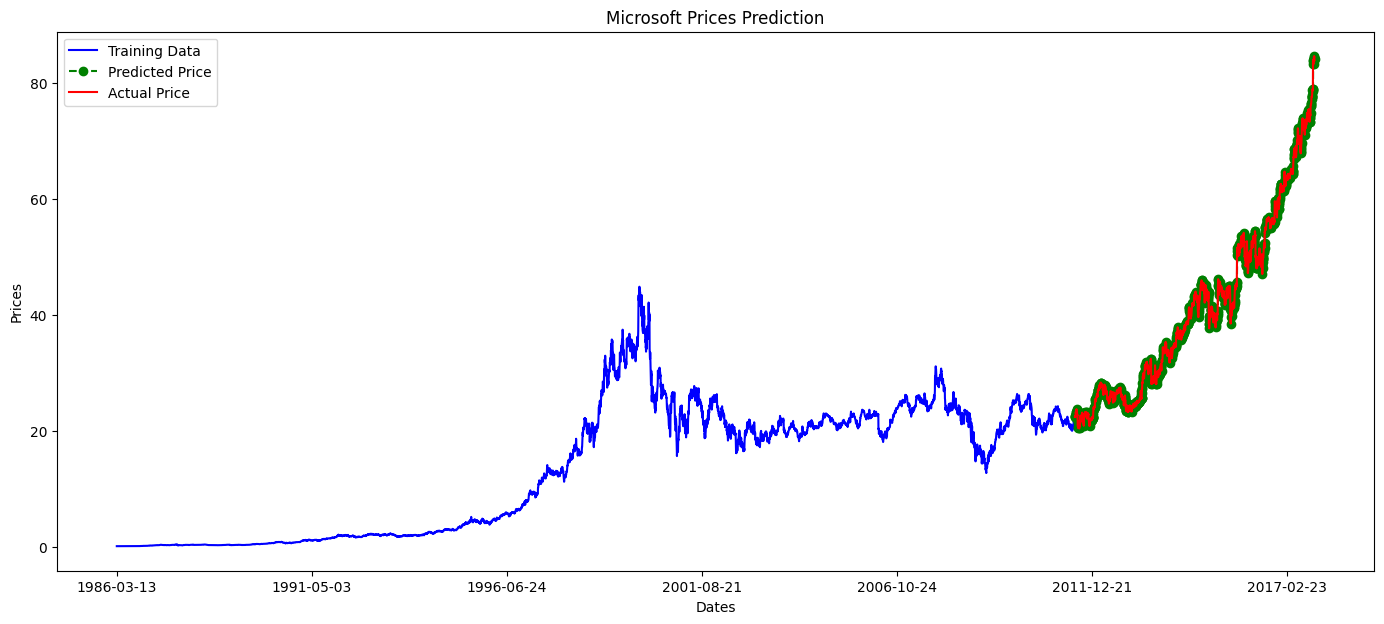

In [20]:
# Plot the predictions
plt.figure(figsize=(17,7))
plt.plot(train_data['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green',marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

### Lets Compare Predicted and Actual visually

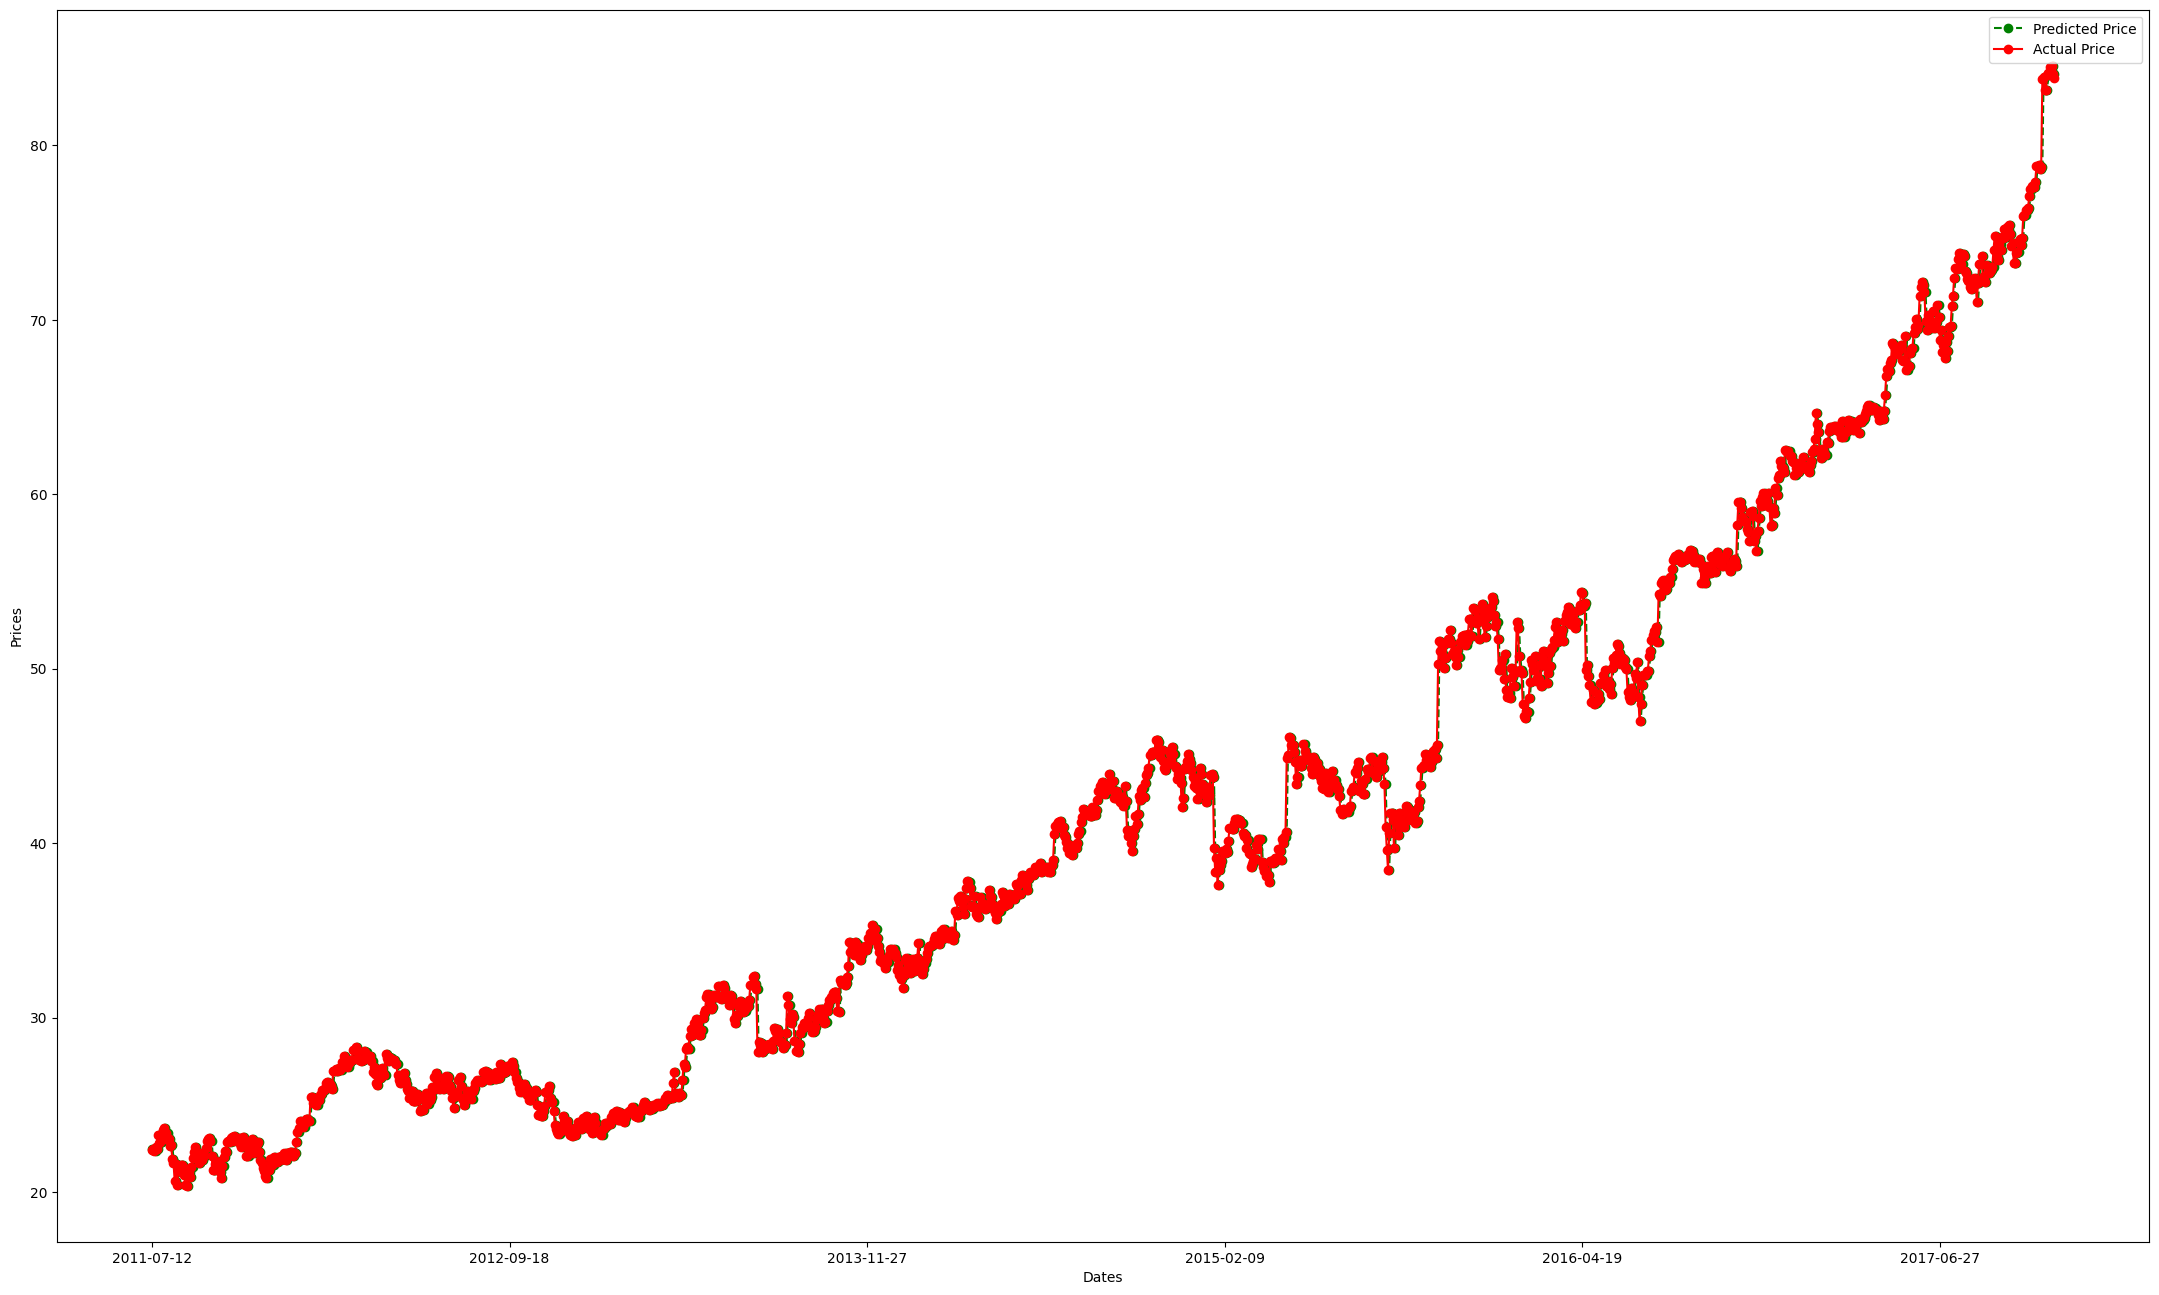

In [21]:
plt.figure(figsize=(27,16))
#ax3 = plt.subplot(222)
plt.plot(test_data.index, predictions, color='green',marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red',marker='o', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(ticks=np.arange(6386,7982, step=300), labels=df['Date'][6386:7982:300])
plt.legend()
plt.show()

Also read: [Smooth Exponential Smoothing method applied to Microsoft stocks data](http://rstudio-pubs-static.s3.amazonaws.com/399202_e78dfd98a7434405893996f2e7cf4b37.html)

### Please answer the questions below to complete the experiment:




In [22]:
#@title State True or False: In ARIMA model the parameter 'd' refers to a differencing method of transforming a non-stationary time series into a stationary one {run: "auto", form-width: "500px", display-mode: "form" }
Answer = "true" #@param ["", "true","false"]


In [23]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [24]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Good for practice" #@param {type:"string"}

In [25]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [26]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [27]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [28]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7315
Date of submission:  23 Sep 2023
Time of submission:  12:45:26
View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions
